# Homework 6 – Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv('credit_card_clean.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df = df.drop("ID", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 1. Change the type of the feature variables as you see fit. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

It looks like we need to change some of these features to be categorical variables. 

In [7]:
categorical = ['SEX','EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']

In [8]:
for col in categorical:
    df[col]=df[col].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  float64 
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_1      30000 non-null  category
 6   PAY_2      30000 non-null  category
 7   PAY_3      30000 non-null  category
 8   PAY_4      30000 non-null  category
 9   PAY_5      30000 non-null  category
 10  PAY_6      30000 non-null  category
 11  BILL_AMT1  30000 non-null  float64 
 12  BILL_AMT2  30000 non-null  float64 
 13  BILL_AMT3  30000 non-null  float64 
 14  BILL_AMT4  30000 non-null  float64 
 15  BILL_AMT5  30000 non-null  float64 
 16  BILL_AMT6  30000 non-null  float64 
 17  PAY_AMT1   30000 non-null  float64 
 18  PAY_AMT2   30000 non-null  float64 
 19  PAY_AMT3   30000 non-null

## 2. Define your target variable

In [10]:
# first we look at target variable proportions:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


**What are the proportions of default vs non-default in your data set? Is the target variable balanced or relatively imbalanced?**

About 22% defaulted, and 78% didn't default. This means that the target variable is relatively balanced, but we still need to be cautious when using accuracy as our preformance metric. 

In [11]:
df.isna().sum()  

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

## 3. Change categorical variables to dummy variables

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,DEFAULT_1
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,0,0,0,0,0,0,0,1
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,1,0,0,0,0,0,0,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,1,0,0,0,0,0,0,0,0


**How many features you have now?**

It looks like there are 79 features! 

In [14]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,DEFAULT_1
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.191333,0.542867,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.393357,0.498167,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Define the feature space and split the data 

In [40]:
y = df['DEFAULT_1']
X = df.drop('DEFAULT_1', axis=1) # becareful inplace= False

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [42]:
X_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
25941,210000.0,34,25650.0,1360.0,31793.0,32943.0,30019.0,30657.0,1360.0,31793.0,...,0,0,1,0,0,0,0,0,0,0
44,40000.0,30,18927.0,21295.0,25921.0,25209.0,26636.0,29197.0,3000.0,5000.0,...,0,0,1,0,0,0,0,0,0,0
16295,120000.0,39,116983.0,117616.0,74853.0,78692.0,78456.0,76140.0,5750.0,4000.0,...,0,0,0,1,0,0,0,0,0,0
20232,280000.0,51,390.0,11223.0,15225.0,4951.0,2408.0,8360.0,11223.0,15262.0,...,0,1,0,0,0,0,0,0,0,0
888,90000.0,24,24401.0,22771.0,19461.0,16181.0,14669.0,14422.0,1454.0,1384.0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
y_train.head()

25941    0
44       0
16295    0
20232    1
888      0
Name: DEFAULT_1, dtype: uint8

## 5. From sklearn.linear_model import the relevant functions for Logistic Regression.

In [44]:
from sklearn.linear_model import LogisticRegression

### 1. Train the logistic regression model using its default parameters.

In [45]:
# Fitting Logistic Regression to the Training set
logistic = LogisticRegression(penalty='none') #pure logistic regression, not ridge 
logistic.fit(X_train, y_train)

LogisticRegression(penalty='none')

### 2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.

In [46]:
# Predicting the Test set probabilities and classes
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of defaults

In [47]:
np.round(logistic.predict_proba(X_test),3)

array([[0.907, 0.093],
       [0.785, 0.215],
       [0.536, 0.464],
       ...,
       [0.815, 0.185],
       [0.622, 0.378],
       [0.79 , 0.21 ]])

In [48]:
np.max(y_hat_probs)

0.6016606979312186

### 3. Plot the histogram of y_hat_probs

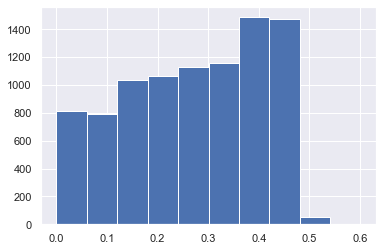

In [49]:
plt.hist(y_hat_probs)
plt.show()

**Explain what you see. If you set threshold=0.80, what does the model always predict? What is the implication for recall?**

This histogram shows us that the data set is relatively balanced. If we set the threshhold at 0.8, the model would always predict "no default". This means that recall would decrease, and likely converge to 0. 

### 4. Generate predicted classifications for two different thresholds (30% and 60% threshold). Save these new predictions as y_hat_30 and y_hat_60.

In [50]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)

**Which threshold should you use if your goal is to avoid too many false negatives?**

We should use a threshhold of 30% if we want to avoid false negatives. 

### 5. Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part

In [51]:
# let's put all the predictions together in a data frame.
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat': y_hat, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_60':y_hat_60})
df_predictions.tail()

,y_test,y_hat,y_hat_probs,y_hat_30,y_hat_60
14308,0,0,0.000718,0,0
20266,1,0,0.455561,1,0
15837,0,0,0.185484,0,0
3323,0,0,0.377594,1,0
18825,1,0,0.209677,0,0


## 6. Use the function "my_logistic_report()"

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled
 

### 1. Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5

In [56]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = -0.01
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


**Interpret all these statistics. Do you trust the accuracy of the model? why?** 

**Accuracy:** 78% of the predictions were correct. </br>
**Precision:** Precision is 0 because none of the people who defaulted were predicted to default, and none of the people predicted to default actually defaulted. </br>
**Recall:** Recall is 0 because of all the people who defaulted on their loans, none of them were predicted to by the model. </br>
**F1 Score:** The f1 score is a combination of precision and recall. Because none of the people who defaulted were predicted to default, leading to both precision and recall of 0, the f1 score is also 0. </br>
**MCC:** The MCC is less than 0, which means that this model does a worse job than a random prediction. </br>
</br>
While the accuracy is fairly high at 78%, this cannot be trusted because the data is imbalanced. This is confirmed with all of the sad values for the other statistics.


### 2. Threshold = 0.3 in the my_logistic_report() function. 

In [29]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.6
Precision = 0.31
Recall    = 0.66
f1_score  = 0.42
MCC       = 0.2
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4129,2882
Actual : positive,682,1307


**What happens to accuracy, precision, recall and f1 score? What happens to false negatives? Is this consistent with you answer to question 5.4?**

When we decrease the threshhold to 30%, accuracy decreases while the values for precision, recall and f1 score increase. The number of false negatives decreases, which is consistend with my answer from question 5.4.  

## 7. Plot the ROC curve and report the AUC score

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.669


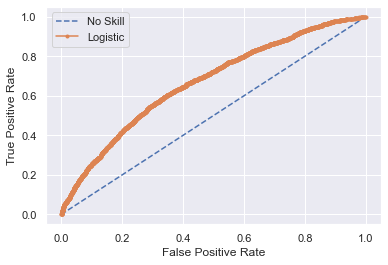

In [31]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Is your model doing a better job than random prediction (no skill)?**

The model is doing a better job than random prediction, because the area under the curve is bigger. 

In [32]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## 8. Estimate the accuracy_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as accuracy_CV5 and accuracy_CV10.

In [33]:
# remember we saved our model in an object called "logistic"
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [34]:
accuracy_CV5=round(f1.mean(),5)
accuracy_CV5

0.77876

In [35]:
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )

In [36]:
accuracy_CV10=round(f1.mean(),5)
accuracy_CV10

0.77871

**Are these numbers close to accuracy score from part 6.1? Report your numbers with 5 digits precision. Why do you think all these 3 numbers are very close to each other?**

In [37]:
def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    accuracy = round(accuracy_score(y_test,y_hat) ,5)
    
    return accuracy
 

In [38]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

0.77867

accuracy_CV5: 0.77876

accuracy_CV10: 0.77871

accuracy_6.1: 0.77867

The numbers from the cross validation are very close to the accuracy score from part 6.1. I think the numbers are all close together simply because cross validation doesn't always improve the model.